In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the files
hp = pd.read_csv('Characters.csv', delimiter = ";")
hpp = hp[['Gender', 'House', 'Blood status', 'Hair colour', 'Eye colour', 'Loyalty']]
hpp.columns = hpp.columns.str.replace("Blood status", "Blood_status")
hpp.columns = hpp.columns.str.replace("Hair colour", "Hair_colour")
hpp.columns = hpp.columns.str.replace("Eye colour", "Eye_colour")

hpp["Blood_status"] = hpp["Blood_status"].replace(["Pure-blood or Half-blood", "Pure-blood or half-blood", "Half-blood or pure-blood"], "Pure-blood or half-blood")
hpp["Blood_status"] = hpp["Blood_status"].replace(["Half-blood["], "Half-blood")
hpp["Blood_status"] = hpp["Blood_status"].replace(["Muggle-born or half-blood["], "Muggle-born or half-blood")

""" hpp = hpp[hpp.Blood_status != "Unknown"]
hpp = hpp[hpp.Blood_status != "Part-Human (Half-giant)"]
hpp = hpp[hpp.Blood_status != "Quarter-Veela"]
hpp = hpp[hpp.Blood_status != "Part-Goblin"]
hpp = hpp[hpp.Blood_status != "Squib"]
hpp = hpp[hpp.Blood_status != "Muggle"]  """

ls = ["Unknown", "Part-Human (Half-giant)", "Quarter-Veela", "Part-Goblin", "Squib", "Muggle"]
for i in ls:
    hpp = hpp[hpp.Blood_status != i]

hpp["Hair_colour"] = hpp["Hair_colour"].replace(["Blond", "White-blond", "Silvery-blonde", "White blond", "Straw blond", "Reddish-blonde", "Dirty-blonde", "Sandy", "Straw-coloured"], "Blonde")
hpp["Hair_colour"] = hpp["Hair_colour"].replace(["Grey", "Silver", "Silver| formerly auburn", "Silver| formerly black", "White (balding)", "Iron grey", "White"], "Silver / White / Grey")
hpp["Hair_colour"] = hpp["Hair_colour"].replace(["Red ", "Ginger", "Red brown", "Brown/greying", "Auburn"], "Red")
hpp["Hair_colour"] = hpp["Hair_colour"].replace(["Bald", "Colourless and balding"], "Bald")
hpp["Hair_colour"] = hpp["Hair_colour"].replace(["Black", "Jet-black", "Colourless and balding"], "Dark")
hpp["Hair_colour"] = hpp["Hair_colour"].replace(["Mousy brown", "Reddish-brown", "Tawny", "Mousy", "Light brown flecked with grey"], "Brown")

hpp = hpp[hpp.Hair_colour != "Variable"]
hpp = hpp[hpp.Hair_colour != "Green"]

hpp["Eye_colour"] = hpp["Eye_colour"].replace(["Bright green", "Gooseberry"], "Green")
hpp["Eye_colour"] = hpp["Eye_colour"].replace(["Bright brown", "Scarlet ", "Ruddy","Black"], "Brown")
hpp["Eye_colour"] = hpp["Eye_colour"].replace([ "Ruddy","Black"], "Dark")
hpp["Eye_colour"] = hpp["Eye_colour"].replace(["Bright Blue", "Grey/Blue[", "Astonishingly blue"], "Blue")
hpp["Eye_colour"] = hpp["Eye_colour"].replace(["Pale silvery", "Silvery", "Dark Grey"], "Blue")


""" hpp = hpp[hpp.Eye_colour != "One dark, one electric blue"]
hpp = hpp[hpp.Eye_colour != "Pale, freckled"]
hpp = hpp[hpp.Eye_colour != "Yellowish"]
hpp = hpp[hpp.Eye_colour != "Yellow"] """

ls3 = ["One dark, one electric blue", "Pale, freckled", "Yellowish", "Yellow"]
for i in ls3:
    hpp = hpp[hpp.Eye_colour != i]

hpp["Loyalty"] = hpp["Loyalty"].replace(["Order of the Phoenix","Dumbledore's Army |Hogwarts School of Witchcraft and Wizardry",
    "Original Order of the Phoenix", "Dumbledore's Army | Order of the Phoenix | Hogwarts School of Witchcraft and Wizardry", 
    "Dumbledore's Army", "Albus Dumbledore | Order of the Phoenix | Hogwarts School of Witchcraft and Wizardry", 
    "Dumbledore's Army | Hogwarts School of Witchcraft and Wizardry", "Ministry of Magic | Order of the Phoenix", 
    "Albus Dumbledore | Dumbledore's Army | Order of the Phoenix | Hogwarts School of Witchcraft and Wizardry", 
    "Order of the Phoenix| British Ministry of Magic", "Order of the Phoenix | Gringotts Wizarding Bank", 
    "Order of the Phoenix| Hogwarts School of Witchcraft and Wizardry |British Ministry of Magic"], "Dumbledore's Army / Order of the Phoenix")

hpp["Loyalty"] = hpp["Loyalty"].replace(["Lord Voldemort  | Death Eaters", "Lord Voldemort| Death Eaters", "Lord Voldemort"], "Lord Voldemort / Death Eaters")
hpp["Loyalty"] = hpp["Loyalty"].replace(["Minister of Magic"], "Ministry of Magic")

hpp = hpp[hpp.Loyalty != "Gellert Grindelwald's Acolytes"]

print(hpp["Eye_colour"].value_counts())

print(hpp[hpp.House == "Gryffindor"])

Brown    24
Blue     17
Grey     12
Dark     11
Green     8
Hazel     1
Name: Eye_colour, dtype: int64
     Gender       House              Blood_status            Hair_colour  \
0      Male  Gryffindor                Half-blood                   Dark   
1      Male  Gryffindor                Pure-blood                    Red   
2    Female  Gryffindor               Muggle-born                  Brown   
3      Male  Gryffindor                Half-blood  Silver / White / Grey   
5      Male  Gryffindor                Pure-blood                 Blonde   
6      Male  Gryffindor                Pure-blood                    Red   
7      Male  Gryffindor                Pure-blood                    Red   
8    Female  Gryffindor                Pure-blood                    Red   
9      Male  Gryffindor               Muggle-born                   Dark   
10     Male  Gryffindor                Half-blood                 Blonde   
11   Female  Gryffindor               Muggle-born            

C:\Users\prizl\AppData\Local\Temp\ipykernel_26292\3882144641.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpp["Blood_status"] = hpp["Blood_status"].replace(["Pure-blood or Half-blood", "Pure-blood or half-blood", "Half-blood or pure-blood"], "Pure-blood or half-blood")
C:\Users\prizl\AppData\Local\Temp\ipykernel_26292\3882144641.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpp["Blood_status"] = hpp["Blood_status"].replace(["Half-blood["], "Half-blood")
C:\Users\prizl\AppData\Local\Temp\ipyke

In [25]:
###REFINING THE DATA###

# 'Gender', 'House', 'Blood status', 
# 'Hair colour', 'Eye colour', 'Loyalty'

gryffindor = [] # 2D lists of traits in Gryffindor [[loyalty], [bloodstatus]]
hufflepuff = [] # lists of traits in Hufflepuff
ravenclaw = []  # lists of traits in Ravenclaw
slytherin = []  # lists of traits in Slytherin

gender_index = 0 # for future indexing 
gender = np.unique(hpp.Gender.values.tolist())
gender = [x for x in gender if str(x) != 'nan'] # remove 'nan'

houselist = np.unique(hpp.House.values.tolist())
houselist = houselist[1:5] # remove 'Durmstrang Institute' and 'nan'

bloodstatus_index = 1
bloodstatuslist = np.unique(hpp.Blood_status.values.tolist())
bloodstatuslist = bloodstatuslist[0:4] # remove 'Pure-blood or half-blood' and 'nan'
bloodstatuslist = np.delete(bloodstatuslist, 2, 0) # remove 'Muggle-born or half-blood'

haircolur_index = 2
haircolour = np.unique(hpp.Hair_colour.values.tolist())
haircolour = [x for x in haircolour if str(x) != 'nan'] # remove 'nan'

eyecolour_index = 3
eyecolour = np.unique(hpp.Eye_colour.values.tolist())
eyecolour = [x for x in eyecolour if str(x) != 'nan'] # remove 'nan'

loyalty_index = 4
loyalty = np.unique(hpp.Loyalty.values.tolist())
loyalty = [x for x in loyalty if str(x) != 'nan'] # remove 'nan'


In [26]:
###INSERTING DATA INTO 2D LISTS gender in index 0###


gryffindor_gender = [] # number of supporter of ['Dumbledore' 'Voldemort' 'Hogwarts' 'Ministry of Magic] in Gryffindor
hufflepuff_gender = [] # number of supporter of ['Dumbledore' 'Voldemort' 'Hogwarts' 'Ministry of Magic] in Hufflepuff
ravenclaw_gender = []  # number of supporter of ['Dumbledore' 'Voldemort' 'Hogwarts' 'Ministry of Magic] in Ravenclaw
slytherin_gender = []  # number of supporter of ['Dumbledore' 'Voldemort' 'Hogwarts' 'Ministry of Magic] in Slytherin

for i in houselist: 
    for j in gender:
    
        df = hpp.loc[(hpp['House'] == i) & (hpp['Gender'] == j)]
        num_row_df = df.shape[0] # gives number of the row (aka Gryffindor and Half-blood)
            
        if i == 'Gryffindor':
            gryffindor_gender.append(num_row_df)
        elif i == 'Hufflepuff':
            hufflepuff_gender.append(num_row_df)
        elif i == 'Ravenclaw':
            ravenclaw_gender.append(num_row_df)
        elif i == 'Slytherin':
            slytherin_gender.append(num_row_df)

gryffindor.append(gryffindor_gender)
hufflepuff.append(hufflepuff_gender)
ravenclaw.append(ravenclaw_gender)
slytherin.append(slytherin_gender)

print(gryffindor)
print(hufflepuff)
print(ravenclaw)
print(slytherin)

[[11, 25]]
[[4, 7]]
[[9, 8]]
[[6, 21]]


In [27]:
###INSERTING DATA INTO 2D LISTS BLOOD in index 1###

gryffindor_blood = [] # number of ['Half-blood' 'Muggle-born' 'Pure-blood'] in Gryffindor
hufflepuff_blood = [] # number of ['Half-blood' 'Muggle-born' 'Pure-blood'] in Hufflepuff
ravenclaw_blood = []  # number of ['Half-blood' 'Muggle-born' 'Pure-blood'] in Ravenclaw
slytherin_blood = []  # number of ['Half-blood' 'Muggle-born' 'Pure-blood'] in Slytherin

for i in houselist: 
    for j in bloodstatuslist:
    
        df = hpp.loc[(hpp['House'] == i) & (hpp['Blood_status'] == j)]
        num_row_df = df.shape[0] # gives number of the row (e.g. Gryffindor and Half-blood)
            
        if i == 'Gryffindor':
            gryffindor_blood.append(num_row_df)
        elif i == 'Hufflepuff':
            hufflepuff_blood.append(num_row_df)
        elif i == 'Ravenclaw':
            ravenclaw_blood.append(num_row_df)
        elif i == 'Slytherin':
            slytherin_blood.append(num_row_df)

gryffindor.append(gryffindor_blood)
hufflepuff.append(gryffindor_blood)
ravenclaw.append(gryffindor_blood)
slytherin.append(gryffindor_blood)

print(gryffindor)
print(hufflepuff)
print(ravenclaw)
print(slytherin)

[[11, 25], [7, 5, 14]]
[[4, 7], [7, 5, 14]]
[[9, 8], [7, 5, 14]]
[[6, 21], [7, 5, 14]]


In [28]:
###INSERTING DATA INTO 2D LISTS haircolour in index 2###

gryffindor_haircolour = [] # number of ['Half-haircolour' 'Muggle-born' 'Pure-haircolour'] in Gryffindor
hufflepuff_haircolour = [] # number of ['Half-haircolour' 'Muggle-born' 'Pure-haircolour'] in Hufflepuff
ravenclaw_haircolour = []  # number of ['Half-haircolour' 'Muggle-born' 'Pure-haircolour'] in Ravenclaw
slytherin_haircolour = []  # number of ['Half-haircolour' 'Muggle-born' 'Pure-haircolour'] in Slytherin

for i in houselist: 
    for j in haircolour:
    
        df = hpp.loc[(hpp['House'] == i) & (hpp['Hair_colour'] == j)]
        num_row_df = df.shape[0] # gives number of the row (e.g. Gryffindor and Half-haircolour)
            
        if i == 'Gryffindor':
            gryffindor_haircolour.append(num_row_df)
        elif i == 'Hufflepuff':
            hufflepuff_haircolour.append(num_row_df)
        elif i == 'Ravenclaw':
            ravenclaw_haircolour.append(num_row_df)
        elif i == 'Slytherin':
            slytherin_haircolour.append(num_row_df)

gryffindor.append(gryffindor_haircolour)
hufflepuff.append(gryffindor_haircolour)
ravenclaw.append(gryffindor_haircolour)
slytherin.append(gryffindor_haircolour)

print(gryffindor)
print(hufflepuff)
print(ravenclaw)
print(slytherin)

[[11, 25], [7, 5, 14], [1, 5, 6, 8, 12, 2]]
[[4, 7], [7, 5, 14], [1, 5, 6, 8, 12, 2]]
[[9, 8], [7, 5, 14], [1, 5, 6, 8, 12, 2]]
[[6, 21], [7, 5, 14], [1, 5, 6, 8, 12, 2]]


In [29]:
###INSERTING DATA INTO 2D LISTS eyecolour in index 3###

gryffindor_eyecolour = [] # number of ['Half-eyecolour' 'Muggle-born' 'Pure-eyecolour'] in Gryffindor
hufflepuff_eyecolour = [] # number of ['Half-eyecolour' 'Muggle-born' 'Pure-eyecolour'] in Hufflepuff
ravenclaw_eyecolour = []  # number of ['Half-eyecolour' 'Muggle-born' 'Pure-eyecolour'] in Ravenclaw
slytherin_eyecolour = []  # number of ['Half-eyecolour' 'Muggle-born' 'Pure-eyecolour'] in Slytherin

for i in houselist: 
    for j in eyecolour:
    
        df = hpp.loc[(hpp['House'] == i) & (hpp['Eye_colour'] == j)]
        num_row_df = df.shape[0] # gives number of the row (e.g. Gryffindor and Half-eyecolour)
            
        if i == 'Gryffindor':
            gryffindor_eyecolour.append(num_row_df)
        elif i == 'Hufflepuff':
            hufflepuff_eyecolour.append(num_row_df)
        elif i == 'Ravenclaw':
            ravenclaw_eyecolour.append(num_row_df)
        elif i == 'Slytherin':
            slytherin_eyecolour.append(num_row_df)

gryffindor.append(gryffindor_eyecolour)
hufflepuff.append(gryffindor_eyecolour)
ravenclaw.append(gryffindor_eyecolour)
slytherin.append(gryffindor_eyecolour)

print(gryffindor)
print(hufflepuff)
print(ravenclaw)
print(slytherin)

[[11, 25], [7, 5, 14], [1, 5, 6, 8, 12, 2], [6, 9, 2, 6, 2, 1]]
[[4, 7], [7, 5, 14], [1, 5, 6, 8, 12, 2], [6, 9, 2, 6, 2, 1]]
[[9, 8], [7, 5, 14], [1, 5, 6, 8, 12, 2], [6, 9, 2, 6, 2, 1]]
[[6, 21], [7, 5, 14], [1, 5, 6, 8, 12, 2], [6, 9, 2, 6, 2, 1]]


In [30]:
###INSERTING DATA INTO 2D LISTS LOYALTY in index 4###

gryffindor_loyalty = [] # number of supporter of ['Dumbledore' 'Voldemort' 'Hogwarts' 'Ministry of Magic] in Gryffindor
hufflepuff_loyalty = [] # number of supporter of ['Dumbledore' 'Voldemort' 'Hogwarts' 'Ministry of Magic] in Hufflepuff
ravenclaw_loyalty = []  # number of supporter of ['Dumbledore' 'Voldemort' 'Hogwarts' 'Ministry of Magic] in Ravenclaw
slytherin_loyalty = []  # number of supporter of ['Dumbledore' 'Voldemort' 'Hogwarts' 'Ministry of Magic] in Slytherin

for i in houselist: 
    for j in loyalty:
    
        df = hpp.loc[(hpp['House'] == i) & (hpp['Loyalty'] == j)]
        num_row_df = df.shape[0] # gives number of the row (aka Gryffindor and Half-blood)
            
        if i == 'Gryffindor':
            gryffindor_loyalty.append(num_row_df)
        elif i == 'Hufflepuff':
            hufflepuff_loyalty.append(num_row_df)
        elif i == 'Ravenclaw':
            ravenclaw_loyalty.append(num_row_df)
        elif i == 'Slytherin':
            slytherin_loyalty.append(num_row_df)

gryffindor.append(gryffindor_loyalty)
hufflepuff.append(hufflepuff_loyalty)
ravenclaw.append(ravenclaw_loyalty)
slytherin.append(slytherin_loyalty)

print(gryffindor)
print(hufflepuff)
print(ravenclaw)
print(slytherin)

[[11, 25], [7, 5, 14], [1, 5, 6, 8, 12, 2], [6, 9, 2, 6, 2, 1], [30, 1, 1, 0]]
[[4, 7], [7, 5, 14], [1, 5, 6, 8, 12, 2], [6, 9, 2, 6, 2, 1], [6, 0, 0, 0]]
[[9, 8], [7, 5, 14], [1, 5, 6, 8, 12, 2], [6, 9, 2, 6, 2, 1], [6, 0, 1, 0]]
[[6, 21], [7, 5, 14], [1, 5, 6, 8, 12, 2], [6, 9, 2, 6, 2, 1], [0, 0, 10, 1]]


In [39]:
def plot(n):
    '''either plot gender, bloodstatus, haircolour, eyecolour, loyalty depending on the house
    gender = 0, bloodstatus = 1, haircolour = 2, eyecolour = 3, loyalty = 4'''

    fig, axs = plt.subplots(2, 2)

    for i in [0,1]:
        for j in [0,1]:
                    if i == 0 and j == 0:
                        x = gryffindor[n]
                        title = 'Gryffindor'
                    elif i == 0 and j == 1:
                        x = hufflepuff[n]
                        title = 'Hufflepuff'
                    elif i == 1 and j == 0:
                        x = ravenclaw[n]
                        title = 'Ravenclaw'
                    else: 
                        x = slytherin[n]
                        title = 'Slytherin'

                    axs[i, j].pie(x, shadow=True, startangle = 90)
                    axs[i, j].set_title(title)

        # draw circle
        centre_circle = plt.Circle((0, 0), 0.70, fc='black') # readjust color depending on background
        fig = plt.gcf()
        # Adding Circle in Pie chart
        fig.gca().add_artist(centre_circle)

        if n == gender_index: 
            fig.legend(fig,     # The line objects
                labels=gender,   # The labels for each line
                loc="center",   # Position of legend
                borderaxespad=0.1,    # Small spacing around legend box
                title="Gender"  # Title for the legend
                )
        elif n == bloodstatus_index:
            fig.legend(fig,     # The line objects
                labels=bloodstatuslist,   # The labels for each line
                loc="center",   # Position of legend
                borderaxespad=0.1,    # Small spacing around legend box
                title="Bloodstatus"  # Title for the legend
                )
        elif n == haircolur_index:
            fig.legend(fig,     # The line objects
                labels=haircolour,   # The labels for each line
                loc="center",   # Position of legend
                borderaxespad=0.1,    # Small spacing around legend box
                title="Haircolour"  # Title for the legend
                )
        elif n == eyecolour_index:
            fig.legend(fig,     # The line objects
                labels=eyecolour,   # The labels for each line
                loc="center",   # Position of legend
                borderaxespad=0.1,    # Small spacing around legend box
                title="Eyecolour"  # Title for the legend
                )
        elif n == loyalty_index:
            fig.legend(fig,     # The line objects
                labels=loyalty,   # The labels for each line
                loc="center",   # Position of legend
                borderaxespad=0.1,    # Small spacing around legend box
                title="Loyalty"  # Title for the legend
                )


In [ ]:
# try out more different plots
# explode = (0.05, 0.05, 0.05, 0.05, 0.05)
# use explode, donut plot

C:\Users\prizl\AppData\Local\Temp\ipykernel_26292\2104407941.py:60: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(fig,     # The line objects


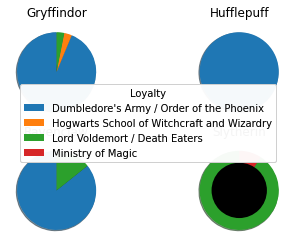

In [44]:
plot(4)